In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cc_df = pd.read_csv('fraud.csv')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [6]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


# * 사기 여부 갯수 확인하기

In [7]:
cc_df[cc_df['is_fraud'] == 1].value_counts()

trans_date_trans_time  cc_num               merchant                             category       amt      first    last      gender  street                      city         state  zip    lat      long       city_pop  job                                                dob         trans_num                         unix_time   merch_lat  merch_long   is_fraud
2019-01-12 00:59:01    581686439828         fraud_Zieme, Bode and Dooley         gas_transport  11.73    Larry    House     M       911 Sabrina Trafficway      Cochranton   PA     16314  41.5205  -80.0573   5507      Retail merchandiser                                1973-07-28  77c44b4cff9a624f54d389887605dbb2  1326329941  41.947427  -79.796264   1           1
2020-04-24 22:10:27    6011724471098086     fraud_Jakubowski Group               food_dining    127.44   Ann      Lawson    F       144 Evans Islands Apt. 683  Burbank      WA     99323  46.1966  -118.9017  3684      Musician                                           1981-11-2

# 1. 사기거래 여부를 예측하는 데 불필요한 컬럼을 제거합니다. (1차 제거)

In [8]:
cc_df = cc_df.drop(['first' , 'last'], axis = 1 )

In [9]:
cc_df = cc_df.rename({'amt' : 'bill'}, axis = 1)

In [10]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [11]:
cc_df = cc_df.drop({'street' , 'zip'}, axis = 1)

In [12]:
cc_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
bill                     0
gender                   0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
cc_df[cc_df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [14]:
cc_df.describe()

,cc_num,bill,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [15]:
cc_df['bill'].sort_values()

258861        1.00
254027        1.00
469101        1.00
257652        1.00
172571        1.00
            ...   
43412     14630.68
198719    15047.03
410031    16837.08
49446     17897.24
93045     25086.94
Name: bill, Length: 491134, dtype: float64

In [16]:
cc_df.loc[43412]

trans_date_trans_time                 2019-03-28 16:53:47
cc_num                                       630451534402
merchant                          fraud_Ankunding-Carroll
category                                           travel
bill                                             14630.68
gender                                                  F
city                                              Wetmore
state                                                  MI
lat                                               46.3535
long                                             -86.6345
city_pop                                              765
job                                          Immunologist
dob                                            1972-06-12
trans_num                c3fd5aeb603b150ce5c05c7ee38ada97
unix_time                                      1332953627
merch_lat                                       46.944452
merch_long                                     -85.746696
is_fraud      

In [17]:
cc_df.groupby('category')['bill'].mean()

category
entertainment      73.130371
food_dining        41.933809
gas_transport      63.071509
grocery_net        51.420363
grocery_pos       126.759293
health_fitness     54.520994
home               55.579635
kids_pets          55.039312
misc_net           82.121960
misc_pos           72.364262
personal_care      45.556418
shopping_net       81.428008
shopping_pos       82.901724
travel             63.335248
Name: bill, dtype: float64

In [18]:
cc_df.groupby('category')['bill'].max()

category
entertainment       792.09
food_dining         663.92
gas_transport       154.03
grocery_net         185.81
grocery_pos         392.00
health_fitness      594.17
home                560.81
kids_pets           472.76
misc_net           4084.34
misc_pos           2703.62
personal_care       523.60
shopping_net       8221.84
shopping_pos       7134.75
travel            25086.94
Name: bill, dtype: float64

In [19]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   bill                   491134 non-null  float64
 5   gender                 491134 non-null  object 
 6   city                   491134 non-null  object 
 7   state                  491134 non-null  object 
 8   lat                    491134 non-null  float64
 9   long                   491134 non-null  float64
 10  city_pop               491134 non-null  int64  
 11  job                    491134 non-null  object 
 12  dob                    491134 non-null  object 
 13  trans_num              491134 non-null  object 
 14  unix_time              491134 non-nu

In [20]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [21]:
cc_df['trans_date_trans_time'].str.split(expand = True)

,0,1
0,2019-01-01,00:00:44
1,2019-01-01,00:12:34
2,2019-01-01,00:17:16
3,2019-01-01,00:20:15
4,2019-01-01,00:23:41
...,...,...
491129,2020-12-31,23:56:48
491130,2020-12-31,23:56:57
491131,2020-12-31,23:59:09
491132,2020-12-31,23:59:15


In [22]:
cc_df['trans_date'] = cc_df['trans_date_trans_time'].str.split().apply(lambda x: x[0])

In [23]:
cc_df['trans_time'] = cc_df['trans_date_trans_time'].str.split().apply(lambda x: x[1])

In [24]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,00:12:34
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,00:17:16
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,00:20:15
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,00:23:41


In [25]:
cc_df[~cc_df['trans_date_trans_time'].str.isdigit()]

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,00:12:34
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,00:17:16
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,00:20:15
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,00:23:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,Wilmington,NC,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,2020-12-31,23:56:48
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,SC,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,2020-12-31,23:56:57
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020-12-31,23:59:09
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020-12-31,23:59:15


In [26]:
from datetime import datetime

In [27]:
cc_df['trans_date_trans_time'] = pd.to_datetime(cc_df['trans_date_trans_time'])

In [28]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   merchant               491134 non-null  object        
 3   category               491134 non-null  object        
 4   bill                   491134 non-null  float64       
 5   gender                 491134 non-null  object        
 6   city                   491134 non-null  object        
 7   state                  491134 non-null  object        
 8   lat                    491134 non-null  float64       
 9   long                   491134 non-null  float64       
 10  city_pop               491134 non-null  int64         
 11  job                    491134 non-null  object        
 12  dob                    491134 non-null  obje

In [29]:
cc_df['dob'] = pd.to_datetime(cc_df['dob'])

In [30]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   merchant               491134 non-null  object        
 3   category               491134 non-null  object        
 4   bill                   491134 non-null  float64       
 5   gender                 491134 non-null  object        
 6   city                   491134 non-null  object        
 7   state                  491134 non-null  object        
 8   lat                    491134 non-null  float64       
 9   long                   491134 non-null  float64       
 10  city_pop               491134 non-null  int64         
 11  job                    491134 non-null  object        
 12  dob                    491134 non-null  date

In [31]:
cc_df['trans_date'] = pd.to_datetime(cc_df['trans_date'])

In [32]:
cc_df['trans_time'] = pd.to_datetime(cc_df['trans_time'])

In [33]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   merchant               491134 non-null  object        
 3   category               491134 non-null  object        
 4   bill                   491134 non-null  float64       
 5   gender                 491134 non-null  object        
 6   city                   491134 non-null  object        
 7   state                  491134 non-null  object        
 8   lat                    491134 non-null  float64       
 9   long                   491134 non-null  float64       
 10  city_pop               491134 non-null  int64         
 11  job                    491134 non-null  object        
 12  dob                    491134 non-null  date

# 2. 최소 2개 이상의 새로운 피처(변수)를 생성해봅시다. (1차 생성)

## 일반적으로 신용카드 사용 나이는 만 19세 이상이기 때문에 사용가능 나이가 맞는지를 위한 

## 'purchasing_age' 컬럼 생성

In [34]:
cc_df['purchasing age'] = cc_df['trans_date']-cc_df['dob']

In [35]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,purchasing age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,2024-11-04 00:00:44,14804 days
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,2024-11-04 00:12:34,13890 days
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,2024-11-04 00:17:16,16237 days
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,2024-11-04 00:20:15,17224 days
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,2024-11-04 00:23:41,15288 days


In [36]:
cc_df['purchasing age'] = cc_df['purchasing age'].dt.days

In [37]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   merchant               491134 non-null  object        
 3   category               491134 non-null  object        
 4   bill                   491134 non-null  float64       
 5   gender                 491134 non-null  object        
 6   city                   491134 non-null  object        
 7   state                  491134 non-null  object        
 8   lat                    491134 non-null  float64       
 9   long                   491134 non-null  float64       
 10  city_pop               491134 non-null  int64         
 11  job                    491134 non-null  object        
 12  dob                    491134 non-null  date

In [38]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,purchasing age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,2024-11-04 00:00:44,14804
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,2024-11-04 00:12:34,13890
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,2024-11-04 00:17:16,16237
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,2024-11-04 00:20:15,17224
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,2024-11-04 00:23:41,15288


In [39]:
# 보통 신용카드 발급 및 사용은 만 19세 이상부터이기 때문에 19*365days = 6,935days 이상이여야 하기 때문에 그 아래는 에러 또는 이상치로 간주
cc_df[cc_df['purchasing age'] < 6935]

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,purchasing age
14,2019-01-01 00:55:05,30273037698427,fraud_Cummings LLC,gas_transport,57.23,M,Thida,AR,35.5762,-91.4539,111,Careers information officer,2000-06-13,044fca5318d0550ed661b507b216f83c,1325379305,36.144895,-92.188172,0,2019-01-01,2024-11-04 00:55:05,6776
29,2019-01-01 01:50:26,3541160328600277,fraud_Funk Group,grocery_net,55.81,M,Murrayville,IL,39.5723,-90.2379,1512,Commercial/residential surveyor,2003-05-07,6ba46336972d5dbe7a38ffb214d9803e,1325382626,39.575819,-90.149623,0,2019-01-01,2024-11-04 01:50:26,5718
44,2019-01-01 03:04:28,4587657402165341815,fraud_Hills-Olson,grocery_net,25.89,F,Pembroke Township,IL,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,76c33ab500644d7795159d1a0eaa243c,1325387068,40.888445,-87.409615,0,2019-01-01,2024-11-04 03:04:28,5351
45,2019-01-01 03:10:00,4587657402165341815,fraud_Friesen-D'Amore,gas_transport,77.59,F,Pembroke Township,IL,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,24bc3a291efe739d2f801fdc487ee3f2,1325387400,41.818260,-88.129609,0,2019-01-01,2024-11-04 03:10:00,5351
134,2019-01-01 10:06:03,30273037698427,fraud_Skiles-Ankunding,grocery_net,36.52,M,Thida,AR,35.5762,-91.4539,111,Careers information officer,2000-06-13,d5ff57efadeb2423551deb8cf761be2b,1325412363,34.681780,-92.171994,0,2019-01-01,2024-11-04 10:06:03,6776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490975,2020-12-31 21:15:45,3576021480694169,"fraud_Hahn, Douglas and Schowalter",travel,7.05,F,Topeka,KS,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,27e1936c706a540dd71589d2aa2adedc,1388524545,39.998111,-95.452864,0,2020-12-31,2024-11-04 21:15:45,5845
490993,2020-12-31 21:40:08,3576021480694169,fraud_Schmitt Ltd,misc_net,2.91,F,Topeka,KS,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,21b9e6020f6eda23f0c013b8a4d9715a,1388526008,38.519571,-96.429821,0,2020-12-31,2024-11-04 21:40:08,5845
491033,2020-12-31 22:13:47,3576021480694169,fraud_Wilkinson Ltd,entertainment,4.88,F,Topeka,KS,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,0a2fa6c6889fc13066286a1385546f06,1388528027,39.906783,-94.914010,0,2020-12-31,2024-11-04 22:13:47,5845
491075,2020-12-31 22:54:39,4587657402165341815,fraud_Haley Group,misc_pos,111.34,F,Pembroke Township,IL,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,20020cbed5388cceffc69289bbe6d3f2,1388530479,41.534827,-87.779693,0,2020-12-31,2024-11-04 22:54:39,6081


In [40]:
cc_df = cc_df.drop(['trans_time'], axis=1)

In [41]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchasing age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,14804
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,13890
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,16237
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,17224
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,15288


In [42]:
cc_df = cc_df.rename({'purchasing age' :'purchase_age' }, axis = 1)

In [43]:
cc_df['purchasing_age'] = cc_df['purchase_age'] / 365

In [44]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchase_age,purchasing_age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,14804,40.558904
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,13890,38.054795
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,16237,44.484932
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,17224,47.189041
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,15288,41.884932


In [45]:
cc_df = cc_df.drop(['purchase_age'], axis = 1)

In [46]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchasing_age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,40.558904
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,38.054795
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,44.484932
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,47.189041
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,41.884932


<AxesSubplot:xlabel='purchasing_age', ylabel='bill'>

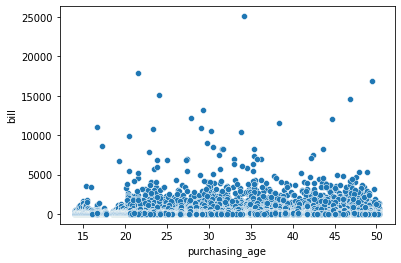

In [47]:
sns.scatterplot(x = cc_df['purchasing_age'], y = cc_df['bill'])

In [48]:
cc_df[cc_df['bill'] > 25000].head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchasing_age
93045,2019-06-14 20:15:38,5540636818935089,fraud_Hackett Group,travel,25086.94,M,Lawrence,MA,42.6911,-71.1605,76383,Geoscientist,1985-04-04,0b902a1e549c98b949444a7557da2403,1339704938,42.397174,-71.474163,0,2019-06-14,34.216438


In [49]:
cc_df.isna().mean()

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
bill                     0.0
gender                   0.0
city                     0.0
state                    0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
trans_date               0.0
purchasing_age           0.0
dtype: float64

In [50]:
cc_df.groupby('category')['bill'].mean()

category
entertainment      73.130371
food_dining        41.933809
gas_transport      63.071509
grocery_net        51.420363
grocery_pos       126.759293
health_fitness     54.520994
home               55.579635
kids_pets          55.039312
misc_net           82.121960
misc_pos           72.364262
personal_care      45.556418
shopping_net       81.428008
shopping_pos       82.901724
travel             63.335248
Name: bill, dtype: float64

In [51]:
cc_df.groupby('category')['bill'].agg(['max' , 'min' , 'median' , 'std'])

,max,min,median,std
category,,,,
entertainment,792.09,1.00,56.240,69.471655
food_dining,663.92,1.00,25.090,49.275784
gas_transport,154.03,6.38,61.970,15.948852
grocery_net,185.81,1.07,49.675,22.032752
grocery_pos,392.00,10.74,105.790,64.625502
health_fitness,594.17,1.00,40.020,51.002178
home,560.81,1.00,41.380,50.630669
kids_pets,472.76,1.00,40.740,50.243733
misc_net,4084.34,1.00,15.990,157.499099


In [52]:
cc_df.groupby('merchant')['bill'].mean().sort_values()

merchant
fraud_Kozey-McDermott                 14.951767
fraud_Treutel-King                    15.682963
fraud_Thiel Ltd                       18.988689
fraud_Larson, Quitzon and Spencer     20.307435
fraud_Fritsch LLC                     22.227821
                                        ...    
fraud_Schultz, Simonis and Little    131.596577
fraud_Murray-Smitham                 133.788407
fraud_Goyette-Herzog                 137.105148
fraud_Tillman LLC                    140.604559
fraud_Hackett Group                  159.259228
Name: bill, Length: 693, dtype: float64

In [53]:
cc_df.groupby('merchant')['bill'].max().sort_values()

merchant
fraud_Kuvalis Ltd                    108.00
fraud_Heller-Abshire                 108.89
fraud_Emard Inc                      109.93
fraud_Tromp, Kerluke and Glover      113.56
fraud_Berge LLC                      114.16
                                     ...   
fraud_Ankunding-Carroll            14630.68
fraud_Goyette-Herzog               15047.03
fraud_Johnston-Casper              16837.08
fraud_Tillman LLC                  17897.24
fraud_Hackett Group                25086.94
Name: bill, Length: 693, dtype: float64

In [54]:
cc_df.groupby('merchant')['bill'].min().sort_values()

merchant
fraud_Hudson-Grady                       1.00
fraud_Roob, Conn and Tremblay            1.00
fraud_Corwin-Gorczany                    1.00
fraud_Lemke-Gutmann                      1.00
fraud_Conroy Ltd                         1.00
                                        ...  
fraud_Kunze Inc                         24.87
fraud_O'Keefe-Hudson                    25.25
fraud_Bradtke PLC                       25.31
fraud_Kling Inc                         26.23
fraud_Connelly, Reichert and Fritsch    26.69
Name: bill, Length: 693, dtype: float64

In [55]:
cc_df.groupby('city')['bill'].mean().sort_values()

city
Cleveland       47.478681
Reno            47.876443
Johns Island    47.963381
Hudson          49.789839
Smiths Grove    50.181933
                  ...    
Manistique      92.415746
Hinckley        92.784096
Rock Springs    93.142125
Grandview       93.724697
Newhall         94.117508
Name: bill, Length: 121, dtype: float64

In [56]:
cc_df.groupby('city')['bill'].max().sort_values()

city
Westport          1228.27
Thida             1234.22
Edisto Island     1334.07
Tekoa             1395.29
Roma              1461.89
                   ...   
Wetmore          14630.68
San Antonio      15047.03
Newhall          16837.08
Clarks Mills     17897.24
Lawrence         25086.94
Name: bill, Length: 121, dtype: float64

In [57]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchasing_age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,40.558904
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,38.054795
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,44.484932
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,47.189041
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,41.884932


In [58]:
cc_df[(cc_df['is_fraud'] == 1) & (cc_df['purchasing_age'] < 19)].value_counts()

trans_date_trans_time  cc_num               merchant                                category        bill     gender  city               state  lat      long      city_pop  job                              dob         trans_num                         unix_time   merch_lat  merch_long  is_fraud  trans_date  purchasing_age
2019-04-27 00:27:27    4587657402165341815  fraud_Deckow-O'Conner                   grocery_pos     314.42   F       Pembroke Township  IL     41.0646  -87.5917  2135      Psychotherapist, child           2004-05-08  ea4f33706626f6fbbd714f7f6170fab2  1335486447  40.724965  -87.692926  1         2019-04-27  14.978082         1
2020-03-18 03:05:25    3576021480694169     fraud_Wolf Inc                          grocery_pos     284.55   F       Topeka             KS     39.1329  -95.7023  163415    Secondary school teacher         2004-12-30  6c3adcdfd50d0ef95b569d6f952f2e95  1363575925  40.087978  -95.892229  1         2020-03-18  15.224658         1
2020-03-19 23:41:50  

In [59]:
pd.DataFrame(cc_df[(cc_df['is_fraud'] == 1) & (cc_df['purchasing_age'] < 19)].value_counts())

,,,,,,,,,,,,,,,,,,,,0
trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchasing_age,
2019-04-27 00:27:27,4587657402165341815,fraud_Deckow-O'Conner,grocery_pos,314.42,F,Pembroke Township,IL,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,ea4f33706626f6fbbd714f7f6170fab2,1335486447,40.724965,-87.692926,1,2019-04-27,14.978082,1
2020-03-18 03:05:25,3576021480694169,fraud_Wolf Inc,grocery_pos,284.55,F,Topeka,KS,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,6c3adcdfd50d0ef95b569d6f952f2e95,1363575925,40.087978,-95.892229,1,2020-03-18,15.224658,1
2020-03-19 23:41:50,3576021480694169,fraud_Nolan-Williamson,kids_pets,19.51,F,Topeka,KS,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,86b21e3ee6e8cca4412d44b11e146eb9,1363736510,39.434525,-96.506285,1,2020-03-19,15.227397,1
2020-03-19 23:18:03,3576021480694169,"fraud_Schmeler, Bashirian and Price",shopping_net,919.36,F,Topeka,KS,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,984c112e6e4875f220a042f4cccfa962,1363735083,38.854547,-96.453802,1,2020-03-19,15.227397,1
2020-03-19 22:48:35,3576021480694169,fraud_Medhurst PLC,shopping_net,1013.74,F,Topeka,KS,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,34e619605fa5f2ef412ba1618c3aeff6,1363733315,38.479489,-95.275460,1,2020-03-19,15.227397,1
2020-03-19 22:41:00,3576021480694169,fraud_Reichel LLC,personal_care,18.34,F,Topeka,KS,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,652168a3338287f77fe08821da5fba9c,1363732860,39.537776,-96.056331,1,2020-03-19,15.227397,1
2020-03-19 21:56:24,3576021480694169,fraud_Botsford and Sons,home,219.73,F,Topeka,KS,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,411ab4d3eeea7d5f3e54f0530e895fbc,1363730184,38.557534,-95.890111,1,2020-03-19,15.227397,1
2020-03-19 21:49:10,3576021480694169,fraud_Friesen Inc,shopping_pos,741.09,F,Topeka,KS,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,64fab52df530153006aca0519d2b58a6,1363729750,38.683418,-96.307186,1,2020-03-19,15.227397,1
2020-03-19 19:26:19,3576021480694169,fraud_Cormier LLC,shopping_net,1186.46,F,Topeka,KS,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,044dfdc5524519a58e440e769a9c502a,1363721179,38.970065,-95.055867,1,2020-03-19,15.227397,1


In [60]:
pd.DataFrame(cc_df[(cc_df['is_fraud'] == 1) & (cc_df['purchasing_age'] > 19)].value_counts())

,,,,,,,,,,,,,,,,,,,,0
trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchasing_age,
2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,M,Cochranton,PA,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1,2019-01-12,45.490411,1
2020-05-11 03:39:09,4452366298769043,fraud_Smith-Stokes,misc_pos,666.26,F,Blooming Grove,TX,32.0758,-96.7010,1563,Financial adviser,1978-03-04,9fd15800101240df5960f4739bf9cb0e,1368243549,32.661829,-97.514864,1,2020-05-11,42.216438,1
2020-05-11 00:42:49,4452366298769043,fraud_Hudson-Grady,shopping_pos,772.08,F,Blooming Grove,TX,32.0758,-96.7010,1563,Financial adviser,1978-03-04,5bbabd619212a26953118c52e92682cd,1368232969,31.877464,-96.174436,1,2020-05-11,42.216438,1
2020-05-07 23:48:02,4536996888716062123,fraud_Fisher Inc,shopping_net,1077.67,M,Espanola,NM,35.9866,-106.0654,18408,Historic buildings inspector/conservation officer,1972-07-18,dcb29303ace0620d09df56aa296bbfb5,1367970482,36.600200,-106.537705,1,2020-05-07,47.835616,1
2020-05-07 23:24:09,4536996888716062123,fraud_Goyette Inc,shopping_net,1141.04,M,Espanola,NM,35.9866,-106.0654,18408,Historic buildings inspector/conservation officer,1972-07-18,10c8e5bb6e15163e9d5797da238ba7b9,1367969049,36.052996,-106.806181,1,2020-05-07,47.835616,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-10 22:39:01,3500969075198072,fraud_Gerlach Inc,shopping_net,1088.07,M,Tekoa,WA,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,959118674a067d41ee041b441ac48538,1344638341,46.356286,-116.904099,1,2019-08-10,20.208219,1
2019-08-10 22:20:47,3500969075198072,fraud_Kassulke PLC,shopping_net,1059.96,M,Tekoa,WA,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,b0465023d869eebaff0769c1b1496b14,1344637247,47.103421,-117.326991,1,2019-08-10,20.208219,1
2019-08-10 22:10:23,3500969075198072,fraud_Metz-Boehm,shopping_pos,1371.81,M,Tekoa,WA,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,20cf5453224328229e06ae7b4df10302,1344636623,47.065996,-116.262297,1,2019-08-10,20.208219,1


In [61]:
cc_df.groupby('city')['is_fraud'].value_counts()

city         is_fraud
Alpharetta   0           3633
             1             13
Armagh       0           3638
             1             11
Bagley       0           3645
                         ... 
Whaleyville  1             11
Wilmington   0           4367
             1              2
Winfield     0           3639
             1             11
Name: is_fraud, Length: 240, dtype: int64

In [62]:
pd.DataFrame(cc_df.groupby('city')['is_fraud'].value_counts())

is_fraud
city        is_fraud          
Alpharetta  0             3633
            1               13
Armagh      0             3638
            1               11
Bagley      0             3645
...                        ...
Whaleyville 1               11
Wilmington  0             4367
            1                2
Winfield    0             3639
            1               11

[240 rows x 1 columns]

In [63]:
pd.DataFrame(cc_df.groupby('category')['is_fraud'].value_counts())

is_fraud
category       is_fraud          
entertainment  0            33566
               1               53
food_dining    0            35918
               1               62
gas_transport  0            45928
               1              101
grocery_net    0            24478
               1                8
grocery_pos    0            42506
               1              216
health_fitness 0            31375
               1               40
home           0            43268
               1               72
kids_pets      0            40227
               1               68
misc_net       0            25070
               1              109
misc_pos       0            32354
               1               57
personal_care  0            35455
               1               58
shopping_net   0            38937
               1              242
shopping_pos   0            48211
               1              134
travel         0            12597
               1               24

In [64]:
pd.DataFrame(cc_df.groupby('merchant')['is_fraud'].value_counts())

is_fraud
merchant                     is_fraud          
fraud_Abbott-Rogahn          0              688
                             1                1
fraud_Abbott-Steuber         0              709
                             1                2
fraud_Abernathy and Sons     0              697
...                                         ...
fraud_Ziemann-Waters         1                1
fraud_Zieme, Bode and Dooley 0              851
                             1                3
fraud_Zulauf LLC             0              719
                             1                1

[1190 rows x 1 columns]

In [65]:
pd.DataFrame(cc_df.groupby('trans_date')['is_fraud'].value_counts())

,,is_fraud
trans_date,is_fraud,
2019-01-01,0,623
2019-01-02,0,280
2019-01-03,0,297
2019-01-04,0,391
2019-01-05,0,371
...,...,...
2020-12-27,0,1398
2020-12-28,0,1757
2020-12-29,0,1661


In [66]:
cc_df.groupby('cc_num')['is_fraud'].value_counts()

cc_num               is_fraud
503874407318         0           3646
                     1              9
567868110212         0           3641
                     1              3
571365235126         0           4364
                                 ... 
4861310130652566408  1              9
4906628655840914250  0           3644
                     1             11
4956828990005111019  0           3647
                     1             10
Name: is_fraud, Length: 246, dtype: int64

In [67]:
cc_df.isna().mean()

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
bill                     0.0
gender                   0.0
city                     0.0
state                    0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
trans_date               0.0
purchasing_age           0.0
dtype: float64

In [68]:
cc_df[cc_df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchasing_age


In [69]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   merchant               491134 non-null  object        
 3   category               491134 non-null  object        
 4   bill                   491134 non-null  float64       
 5   gender                 491134 non-null  object        
 6   city                   491134 non-null  object        
 7   state                  491134 non-null  object        
 8   lat                    491134 non-null  float64       
 9   long                   491134 non-null  float64       
 10  city_pop               491134 non-null  int64         
 11  job                    491134 non-null  object        
 12  dob                    491134 non-null  date

# 2. 최소 2개 이상의 새로운 피처(변수)를 생성해봅시다. (2차 생성)

## 거래가 일어난 시간 및 아침,점심,저녁 여부를 확인하기 위한 'hour_cat' 컬럼 생성

In [70]:
def hour_category(x):
        if (x >= 6) & (x<12):
            return 'morning'
        elif (x >= 12) & (x < 18):
            return 'afternoon'
        elif (x >=18) & (x < 23):
            return 'night'
        else:
            return 'evening'

In [71]:
def hour_func(cc_df):
    cc_df['hour'] = pd.to_datetime(cc_df['trans_date_trans_time']).dt.hour

In [72]:
cc_df['hour'] = pd.to_datetime(cc_df['trans_date_trans_time']).dt.hour

In [73]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchasing_age,hour
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,40.558904,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,38.054795,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,44.484932,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,47.189041,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,41.884932,0


In [74]:
cc_df['hour_cat'] = cc_df['hour'].apply(hour_category)

In [75]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchasing_age,hour,hour_cat
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,40.558904,0,evening
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,38.054795,0,evening
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,44.484932,0,evening
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,47.189041,0,evening
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,41.884932,0,evening


In [76]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchasing_age,hour,hour_cat
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,40.558904,0,evening
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,38.054795,0,evening
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,44.484932,0,evening
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,47.189041,0,evening
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,41.884932,0,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,Wilmington,NC,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,2020-12-31,37.920548,23,evening
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,SC,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,2020-12-31,36.602740,23,evening
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020-12-31,21.027397,23,evening
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020-12-31,39.115068,23,evening


In [77]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   merchant               491134 non-null  object        
 3   category               491134 non-null  object        
 4   bill                   491134 non-null  float64       
 5   gender                 491134 non-null  object        
 6   city                   491134 non-null  object        
 7   state                  491134 non-null  object        
 8   lat                    491134 non-null  float64       
 9   long                   491134 non-null  float64       
 10  city_pop               491134 non-null  int64         
 11  job                    491134 non-null  object        
 12  dob                    491134 non-null  date

In [78]:
pd.DataFrame(cc_df[cc_df['hour_cat'] == 'morning'].value_counts())

,,,,,,,,,,,,,,,,,,,,,,0
trans_date_trans_time,cc_num,merchant,category,bill,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,purchasing_age,hour,hour_cat,
2019-01-01 06:03:32,4716561796955522,fraud_Prohaska-Murray,gas_transport,68.47,F,Heart Butte,MT,48.2777,-112.8456,743,Water engineer,1972-05-04,1022ca6ba7f08dedc233a225d8d7c147,1325397812,47.930197,-112.320743,0,2019-01-01,46.693151,6,morning,1
2020-05-31 09:07:45,372509258176510,fraud_Bahringer-Larson,grocery_net,40.01,F,Goodrich,MI,42.9147,-83.4845,6951,Learning disability nurse,1985-06-18,bd8039418ed5c8221c422f9886df2f6e,1369991265,43.015056,-84.273537,0,2020-05-31,34.975342,9,morning,1
2020-05-31 08:29:19,4908846471916297,fraud_Schamberger-O'Keefe,grocery_pos,149.47,F,Grandview,TX,32.2779,-97.2351,5875,"Radiographer, therapeutic",1992-07-24,8c191570b98825aa5b0accdac7ba3fc4,1369988959,31.738749,-97.608769,0,2020-05-31,27.871233,8,morning,1
2020-05-31 08:30:49,3527536963490470,fraud_Cummerata-Jones,gas_transport,54.00,F,Brunson,SC,32.9413,-81.1807,1725,Social researcher,1974-12-05,d3aab219213954860cf2e363ae376671,1369989049,33.714383,-80.919815,0,2020-05-31,45.517808,8,morning,1
2020-05-31 08:33:16,630424987505,fraud_Miller-Hauck,grocery_pos,72.62,F,Thomas,WV,39.1505,-79.5030,836,Forensic psychologist,1981-08-29,6929059f1860ebe7486b743a0e42ef57,1369989196,40.110007,-80.488774,0,2020-05-31,38.780822,8,morning,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-17 10:51:09,344709867813900,fraud_Morar Inc,grocery_net,35.24,F,Sebring,FL,27.4703,-81.4872,50835,Environmental consultant,1986-01-30,d33433347fd07654140a0612dc8c41bf,1347879069,27.244805,-82.061713,0,2019-09-17,33.652055,10,morning,1
2019-09-17 10:55:44,180031190491743,fraud_Gutmann-Upton,misc_pos,16.07,F,Mobile,AL,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,c5fb77139f87832db40bef86c7f6e22d,1347879344,30.510311,-88.264247,0,2019-09-17,47.731507,10,morning,1
2019-09-17 10:57:06,36913587729122,fraud_Ruecker Group,misc_net,37.98,F,Meridian,ID,43.6498,-116.4306,84106,Intelligence analyst,1971-02-11,9bf13c133c5ca18066c8b0c7b7a36b65,1347879426,42.946031,-116.672443,0,2019-09-17,48.630137,10,morning,1


# 1. 사기거래 여부를 예측하는 데 불필요한 컬럼을 제거합니다. (2차 제거)

In [79]:
cc_df.drop(['merchant' , 'city' , 'state', 'trans_num','unix_time'], axis =1 , inplace=True)

In [80]:
cc_df.head()

,trans_date_trans_time,cc_num,category,bill,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,purchasing_age,hour,hour_cat
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.558904,0,evening
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,1980-12-21,40.079588,-74.848087,0,2019-01-01,38.054795,0,evening
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,40.021888,-74.228188,0,2019-01-01,44.484932,0,evening
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,1971-11-05,42.360426,-83.552316,0,2019-01-01,47.189041,0,evening
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,29.737426,-90.853194,0,2019-01-01,41.884932,0,evening


In [81]:
cc_df.drop(['job'], axis =1 , inplace=True)

In [82]:
cc_df.head()

,trans_date_trans_time,cc_num,category,bill,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_date,purchasing_age,hour,hour_cat
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.558904,0,evening
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,2019-01-01,38.054795,0,evening
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,2019-01-01,44.484932,0,evening
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,2019-01-01,47.189041,0,evening
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,2019-01-01,41.884932,0,evening


In [83]:
new_cc_df = pd.get_dummies(cc_df, columns = ['gender','category','hour_cat'], drop_first = True)

In [84]:
new_cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date_trans_time    491134 non-null  datetime64[ns]
 1   cc_num                   491134 non-null  int64         
 2   bill                     491134 non-null  float64       
 3   lat                      491134 non-null  float64       
 4   long                     491134 non-null  float64       
 5   city_pop                 491134 non-null  int64         
 6   dob                      491134 non-null  datetime64[ns]
 7   merch_lat                491134 non-null  float64       
 8   merch_long               491134 non-null  float64       
 9   is_fraud                 491134 non-null  int64         
 10  trans_date               491134 non-null  datetime64[ns]
 11  purchasing_age           491134 non-null  float64       
 12  hour            

# * 경도,위도를 사용한 수평거리 "km"로 상점과의 거리 계산하기

In [85]:
new_cc_df.head()

,trans_date_trans_time,cc_num,bill,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_date,purchasing_age,hour,gender_M,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour_cat_evening,hour_cat_morning,hour_cat_night
0,2019-01-01 00:00:44,630423337322,107.23,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.558904,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2019-01-01 00:12:34,4956828990005111019,44.71,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,2019-01-01,38.054795,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2019-01-01 00:17:16,180048185037117,46.28,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,2019-01-01,44.484932,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2019-01-01 00:20:15,374930071163758,64.09,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,2019-01-01,47.189041,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2019-01-01 00:23:41,2712209726293386,25.58,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,2019-01-01,41.884932,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [86]:
import math

In [91]:
new_cc_df['distance_km'] = (new_cc_df['merch_lat'] - new_cc_df['lat'])**2 + (new_cc_df['merch_long'] - new_cc_df['long'])**2

In [92]:
new_cc_df.head()

,trans_date_trans_time,cc_num,bill,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_date,purchasing_age,hour,gender_M,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour_cat_evening,hour_cat_morning,hour_cat_night,distance_km
0,2019-01-01 00:00:44,630423337322,107.23,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.558904,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.074153
1,2019-01-01 00:12:34,4956828990005111019,44.71,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,2019-01-01,38.054795,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.743768
2,2019-01-01 00:17:16,180048185037117,46.28,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,2019-01-01,44.484932,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.386918
3,2019-01-01 00:20:15,374930071163758,64.09,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,2019-01-01,47.189041,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.057278
4,2019-01-01 00:23:41,2712209726293386,25.58,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,2019-01-01,41.884932,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.533998


In [93]:
import numpy as np

In [94]:
new_cc_df['distance_km'] = np.sqrt((new_cc_df['merch_lat'] - new_cc_df['lat'])**2 + (new_cc_df['merch_long'] - new_cc_df['long'])**2)

In [95]:
new_cc_df.head()

,trans_date_trans_time,cc_num,bill,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_date,purchasing_age,hour,gender_M,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour_cat_evening,hour_cat_morning,hour_cat_night,distance_km
0,2019-01-01 00:00:44,630423337322,107.23,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.558904,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.272310
1,2019-01-01 00:12:34,4956828990005111019,44.71,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,2019-01-01,38.054795,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.862420
2,2019-01-01 00:17:16,180048185037117,46.28,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,2019-01-01,44.484932,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.622027
3,2019-01-01 00:20:15,374930071163758,64.09,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,2019-01-01,47.189041,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.239327
4,2019-01-01 00:23:41,2712209726293386,25.58,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,2019-01-01,41.884932,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.730752
